In [133]:
import pandas as pd 
import numpy as np
import json
import networkx as nx
from matplotlib import pyplot as plt


In [134]:
data = pd.read_csv("enzyme_graph_features B-501.csv")

# Separate IDs
graph_ids = data["graph_id"]

# Numeric features only
X = data.drop(columns=["graph_id", "Combinatorial features "]).astype(float)

# Fit scaler globally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build normalized dataframe
data_scaled = X.copy()
data_scaled[:] = X_scaled
data_scaled["graph_id"] = graph_ids.values


data_scaled


,num_nodes,num_edges,density,avg_degree,min_degree,max_degree,avg_clustering,avg_degree_centrality,max_degree_centrality,diameter,avg_shortest_path,graph_id
0,1.602088,1.755006,0.368286,1.164873,-0.781815,0.996993,-0.828032,0.368286,0.455367,-1.009263,-0.786712,ranked_0_enzyme_mimicB1-501EN11e
1,-0.539355,0.940310,1.418539,1.302037,1.428794,0.239532,-0.938464,1.418539,0.377048,-1.009263,-0.899986,ranked_0_enzyme_mimicB1-501EN110e
2,-0.137834,0.320682,0.431024,0.419025,-0.781815,-0.517928,-0.314326,0.431024,-0.456991,-0.506015,-0.593978,ranked_0_enzyme_mimicB1-501EN291e
3,-0.003994,1.250124,1.252055,1.383811,0.323490,0.996993,-1.181820,1.252055,0.932116,-1.009263,-0.752912,ranked_0_enzyme_mimicB1-501EN142a
4,-2.814638,-0.539913,1.963697,0.737872,-0.781815,1.754453,-0.772456,1.963697,2.617463,-0.506015,-0.744470,ranked_0_enzyme_mimicB1-501EN260e
...,...,...,...,...,...,...,...,...,...,...,...,...
1905,-1.208556,-1.985712,-1.069984,-1.687697,0.323490,0.239532,1.303679,-1.069984,0.580056,0.500482,1.266089,ranked_0_enzyme_mimicB1-501EN230c
1906,-4.153040,-1.411982,2.281660,0.374395,1.428794,0.996993,-0.557771,2.281660,2.341430,-0.254391,-0.659630,ranked_0_enzyme_mimicB1-501EN73b
1907,-0.940876,-0.734981,0.029392,-0.389995,-0.781815,-1.275389,0.156338,0.029392,-0.958968,0.248858,0.390266,ranked_0_enzyme_mimicB1-501EN298b
1908,0.397526,1.055056,0.706336,0.975690,1.428794,0.239532,-0.616363,0.706336,0.103109,-0.757639,-0.671199,ranked_0_enzyme_mimicB1-501EN161e


In [135]:
from numpy.linalg import norm

def comparing_molecules(data_scaled, id1, id2):

    molecule1 = data_scaled.iloc[id1]["graph_id"]
    molecule2 = data_scaled.iloc[id2]["graph_id"]

    print("\nMolecules to compare:", molecule1, molecule2)

    v1 = data_scaled[data_scaled["graph_id"] == molecule1] \
            .drop(columns=["graph_id"]).to_numpy()[0]

    v2 = data_scaled[data_scaled["graph_id"] == molecule2] \
            .drop(columns=["graph_id"]).to_numpy()[0]

    distance = norm(v1 - v2)

    print("\nv1_norm:\n", v1)
    print("\nv2_norm:\n", v2)
    print("\nDISTANCE:", distance)

    return molecule1, molecule2, distance


#link to graph
def load_graph(json_file):
    with open(json_file, "r") as f:
        data = json.load(f)

    G = nx.Graph()

    # add nodes
    for node in data["nodes"]:
        G.add_node(node["id"], label=node.get("label", node["id"]))

    # add edges
    for edge in data["links"]:
        G.add_edge(
            edge["source"],
            edge["target"],
            weight=edge.get("weight", 1.0)
        )

    return G
    
def draw_graph(G, input_file):
    pos = nx.spring_layout(G, seed=42)

    labels = nx.get_node_attributes(G, "label")
    edge_labels = nx.get_edge_attributes(G, "weight")

    pos = nx.spring_layout(G, seed=42)

    nx.draw(
        G,
        pos,
        with_labels=False,     # usually better for large enzyme graphs
        node_size=50,          # <<< much smaller nodes
        linewidths=0.2
    )
    
    plt.savefig( input_file.split("/")[-1].split(".")[0] + ".png")
    plt.show()

    




Molecules to compare: ranked_0_enzyme_mimicB1-501EN11e ranked_0_enzyme_mimicB1-501EN11a

v1_norm:
 [ 1.60208813  1.75500617  0.36828561  1.16487325 -0.78181496  0.99699251
 -0.82803231  0.36828561  0.45536745 -1.00926306 -0.78671218]

v2_norm:
 [ 1.60208813  1.75500617  0.36828561  1.16487325 -0.78181496 -0.51792849
 -1.15775413  0.36828561 -0.92051157 -0.75763893 -0.70982391]

DISTANCE: 2.0894907785146857


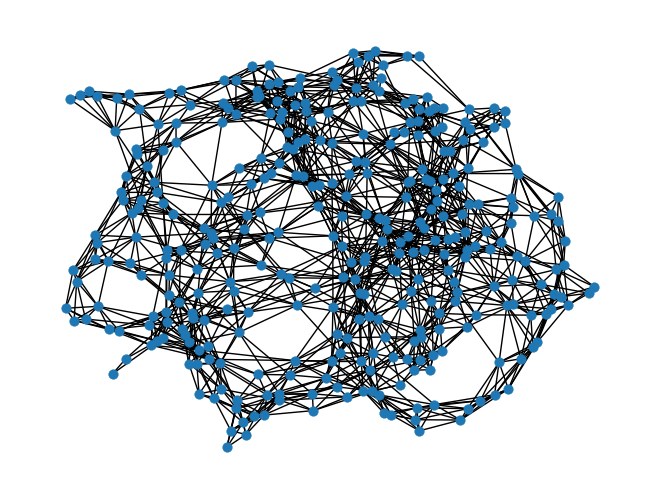

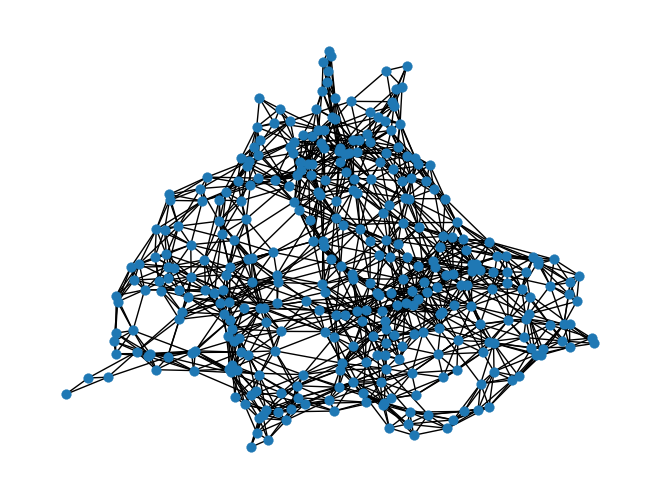

In [144]:
PATH="../enzymes/graphs_json/B-501/"
import random as rd

ID_INSTANCE1=0 #rd.randint(0, 1000)
ID_INSTANCE2=1700 #rd.randint(0, 1000)

molecule1, molecule2, _ = comparing_molecules(data_scaled, ID_INSTANCE1, ID_INSTANCE2)
input_path_file1 = PATH + molecule1 + ".json"
input_path_file2 = PATH + molecule2 + ".json"

G1 = load_graph(input_path_file1)
G2 = load_graph(input_path_file2)

draw_graph(G1, input_path_file1)
draw_graph(G2, input_path_file2)

# DISTANCE  THRESHOLD < 3.0 (similar)

## Cluster the instances: 

In [145]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- feature matrix (drop IDs)
X = data_scaled.drop(columns=["graph_id"]).to_numpy()

# --- search for best k
sil_scores = {}
K_range = range(2, 11)   # try k = 2..10 (adjust if needed)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores[k] = sil
    print(f"k = {k}, silhouette = {sil:.4f}")

# --- pick best k
best_k = max(sil_scores, key=sil_scores.get)
print("\nBest k =", best_k, "with silhouette =", sil_scores[best_k])

# --- final clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
data_scaled["cluster"] = kmeans.fit_predict(X)



k = 2, silhouette = 0.3587
k = 3, silhouette = 0.2279
k = 4, silhouette = 0.1930
k = 5, silhouette = 0.1843
k = 6, silhouette = 0.1868
k = 7, silhouette = 0.1802
k = 8, silhouette = 0.1756
k = 9, silhouette = 0.1777
k = 10, silhouette = 0.1867

Best k = 2 with silhouette = 0.35867698433661566


In [147]:
# --- print instances per cluster
print("\nInstances per cluster:\n")

for c in sorted(data_scaled["cluster"].unique()):
    members = data_scaled[data_scaled["cluster"] == c]["graph_id"].tolist()
    print(f"Cluster {c} ({len(members)} instances):")
    for m in members:
        print("  ", m)
    print()

#> 0.5 → strong structure
#
#0.25–0.5 → reasonable
#
#< 0.25 → weak clustering



Instances per cluster:

Cluster 0 (1368 instances):
   ranked_0_enzyme_mimicB1-501EN11e
   ranked_0_enzyme_mimicB1-501EN110e
   ranked_0_enzyme_mimicB1-501EN291e
   ranked_0_enzyme_mimicB1-501EN142a
   ranked_0_enzyme_mimicB1-501EN260e
   ranked_0_enzyme_mimicB1-501EN195a
   ranked_0_enzyme_mimicB1-501EN32a
   ranked_0_enzyme_mimicB1-501EN123d
   ranked_0_enzyme_mimicB1-501EN313a
   ranked_0_enzyme_mimicB1-501EN306c
   ranked_0_enzyme_mimicB1-501EN290b
   ranked_0_enzyme_mimicB1-501EN264b
   ranked_0_enzyme_mimicB1-501EN64c
   ranked_0_enzyme_mimicB1-501EN20c
   ranked_0_enzyme_mimicB1-501EN362b
   ranked_0_enzyme_mimicB1-501EN364c
   ranked_0_enzyme_mimicB1-501EN16b
   ranked_0_enzyme_mimicB1-501EN403e
   ranked_0_enzyme_mimicB1-501EN18e
   ranked_0_enzyme_mimicB1-501EN220a
   ranked_0_enzyme_mimicB1-501EN136c
   ranked_0_enzyme_mimicB1-501EN328b
   ranked_0_enzyme_mimicB1-501EN341e
   ranked_0_enzyme_mimicB1-501EN315e
   ranked_0_enzyme_mimicB1-501EN343e
   ranked_0_enzyme_mimicB1-5

/home/marko/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


ValueError: x and y must be the same size

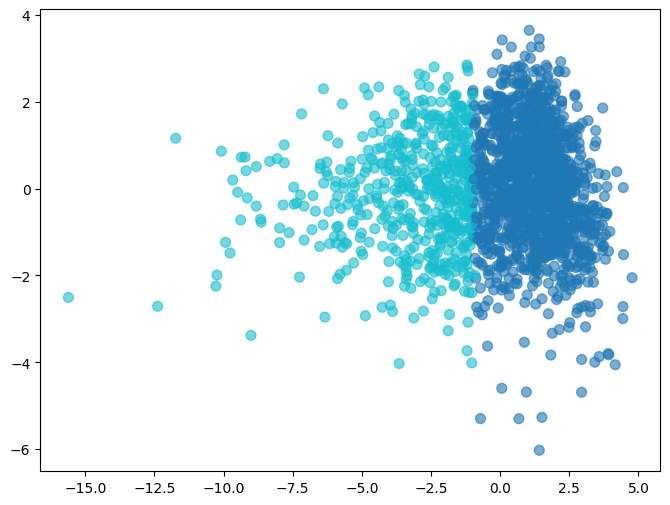

In [149]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- assume your data_scaled DataFrame has 'graph_id', 'cluster', and numeric features ---
feature_columns = [col for col in data_scaled.columns if col not in ["graph_id", "cluster", "PC1", "PC2"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_scaled[feature_columns])

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
data_scaled["PC1"] = X_pca[:, 0]
data_scaled["PC2"] = X_pca[:, 1]

# Compute centroids in feature space
centroids = data_scaled.groupby("cluster")[feature_columns].mean()
centroids_pca = pca.transform(centroids)

# --- Plot 2D PCA with clusters and centroids ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_scaled["PC1"], data_scaled["PC2"],
    c=data_scaled["cluster"], cmap="tab10", alpha=0.6, s=50, label="Molecules"
)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c="black", marker="X", s=200, label="Cluster Centroids"
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of Molecule Clusters")
plt.legend()
plt.grid(True)
plt.show()

# --- Print instances per cluster ---
print("\nInstances per cluster:\n")
for c in sorted(data_scaled["cluster"].unique()):
    members = data_scaled[data_scaled["cluster"] == c]["graph_id"].tolist()
    print(f"Cluster {c} ({len(members)} instances):")
    for m in members:
        print("  ", m)
    print()

# --- Optional: print cluster centroids (prototype molecules) ---
print("\nCluster centroids in original feature space:\n")
for c, row in centroids.iterrows():
    print(f"Cluster {c} centroid:")
    print(row.to_dict())
    print()
